In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPool2D, Input, Softmax, Activation, Flatten
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import concatenate,AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers,models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# colab path
# load driver for google colab
# under github version, the next several lines could be ignored
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# colab file path
train_path = '/content/drive/Shared drives/590 project/blood-cells-sample/dataset2-master/dataset2-master/images/TRAIN/'
test_path = '/content/drive/Shared drives/590 project/blood-cells-sample/dataset2-master/dataset2-master/images/TEST_SIMPLE/'

In [0]:
def get_data(folder):
    #    Load the data and labels from the given folder.
    X = []
    y = []
    #z = []
    for wbc_type in os.listdir(folder):
        #print(wbc_type)
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL']:
                label = 1
                #label2 = 1
            elif wbc_type in ['EOSINOPHIL']:
                label = 2
                #label2 = 1
            elif wbc_type in ['MONOCYTE']:
                label = 3  
                #label2 = 0
            elif wbc_type in ['LYMPHOCYTE']:
                label = 4 
                #label2 = 0
            else:
                label = 5
                #label2 = 0
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, dsize=(80,60), interpolation=cv2.INTER_CUBIC)
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    #z.append(label2)
    X = np.asarray(X)
    y = np.asarray(y)
    #z = np.asarray(z)
    #return X,y,z
    return X,y

In [0]:
#train_x,train_y,train_z = get_data(train_path)
#test_x,test_y,test_z = get_data(test_path)
train_x,train_y = get_data(train_path)
test_x,test_y = get_data(test_path)

100%|██████████| 13/13 [00:06<00:00,  2.22it/s]


In [0]:
neu,eos,mon,lym = [],[],[],[]
import pandas as pd
pd.value_counts(train_y)

4    120
3    120
2    120
1    120
dtype: int64

In [0]:
for file in random.choices(os.listdir(train_path + 'NEUTROPHIL'),k = 4):
    img_file = cv2.imread(train_path + 'NEUTROPHIL/' + file)
    neu.append(img_file)
neu = np.asarray(neu)

In [0]:
for file in random.choices(os.listdir(train_path + 'EOSINOPHIL'),k = 4):
    img_file = cv2.imread(train_path + 'EOSINOPHIL/' + file)
    eos.append(img_file)
eos = np.asarray(eos)

In [0]:
for file in random.choices(os.listdir(train_path + 'MONOCYTE'),k = 4):
    img_file = cv2.imread(train_path + 'MONOCYTE/' + file)
    mon.append(img_file)
mon = np.asarray(mon)

In [0]:
for file in random.choices(os.listdir(train_path + 'LYMPHOCYTE'),k = 4):
    img_file = cv2.imread(train_path + 'LYMPHOCYTE/' + file)
    lym.append(img_file)
lym = np.asarray(lym)

Text(0.5, 1.0, 'NEUTROPHIL')

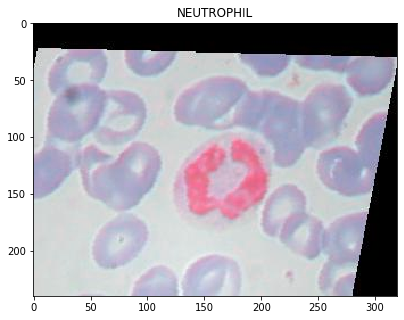

In [0]:
plt.figure(figsize = (30,30))
plt.subplot(4,4,1)
plt.imshow(neu[1])
plt.title('NEUTROPHIL')

In [0]:
neu0 = cv2.cvtColor(neu[1], cv2.COLOR_BGR2RGB)

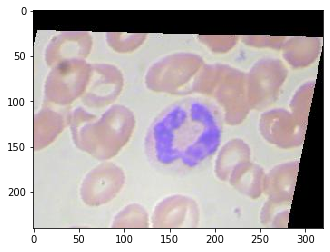

In [0]:
plt.imshow(neu0)
plt.show()

In [0]:
lower_red=np.array([156, 43, 46])
upper_red=np.array([180, 255, 255])
hsv_neu0 = cv2.cvtColor(neu[1], cv2.COLOR_RGB2HSV)


In [0]:
lower_red1 = np.array([125, 43, 46])
upper_red1 = np.array([155, 255, 255])

In [0]:
mask1= cv2.inRange(hsv_neu0, lower_red1, upper_red1)
result1=cv2.bitwise_and(neu0, neu0, mask=mask1)

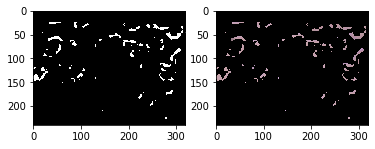

In [0]:
plt.subplot(1, 2, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result1)
plt.show()

In [0]:
hsv_image = cv2.cvtColor(neu[1], cv2.COLOR_RGB2HSV)

    # Set the orange range
light_red = (156, 43, 46)
dark_red = (180, 255, 255)
mask = cv2.inRange(hsv_image, light_red, dark_red)


In [0]:
result = cv2.bitwise_and(hsv_image, hsv_image, mask=mask)

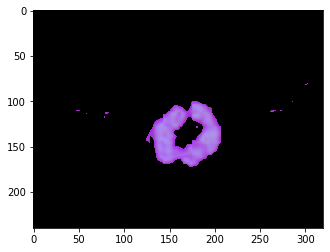

<Figure size 720x720 with 0 Axes>

In [0]:
#plt.subplot(1, 2, 1)
#plt.imshow(mask, cmap="gray")
#plt.subplot(1, 2, 2)
plt.imshow(result)
plt.figure(figsize = (10,10))

plt.show()

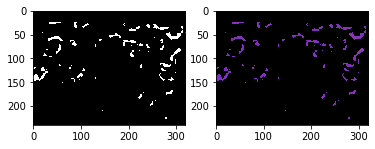

In [0]:
light_purple = (125, 43, 46)
dark_purple = (155, 255, 255)
mask_purple = cv2.inRange(hsv_image,light_purple, dark_purple)
result1=cv2.bitwise_and(hsv_image, hsv_image, mask=mask_purple)
plt.subplot(1, 2, 1)
plt.imshow(mask_purple, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result1)
plt.show()

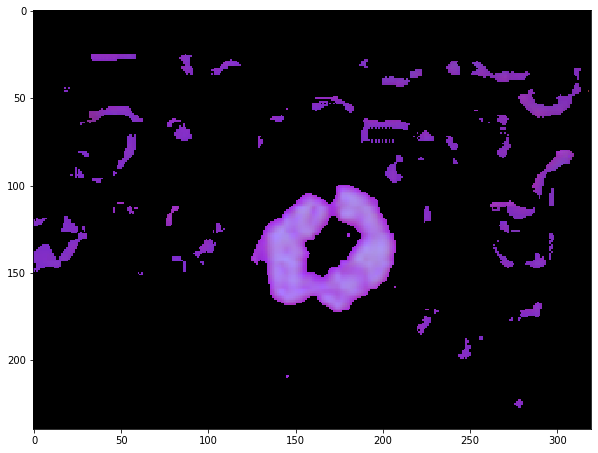

In [0]:
final_mask = mask + mask_purple
final_result = cv2.bitwise_and(hsv_image, hsv_image, mask=final_mask)
#plt.subplot(1, 2, 1)
#plt.imshow(final_mask,cmap="gray")
#plt.subplot(1, 2, 2)
plt.figure(figsize = (10,10))
plt.imshow(final_result)
plt.show()

In [0]:
def segment(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_red = (156, 43, 46)
    dark_red = (180, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_red, dark_red)

    # Set a white range
    light_purple = (125, 43, 46)
    dark_purple = (155, 255, 255)

    # Apply the white mask
    mask_purple = cv2.inRange(hsv_image,light_purple, dark_purple)

    # Combine the two masks
    final_mask = mask + mask_purple
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    #blur = cv2.GaussianBlur(result, (7, 7), 0)
    return result

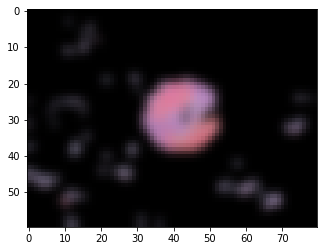

In [0]:
a=segment_fish(train_x[0])
plt.imshow(a)
plt.show()

In [0]:
mask = cv2.inRange(hsv_neu0, lower_red, upper_red)

In [0]:
result = cv2.bitwise_and(neu0, neu0, mask=mask)

In [0]:
blur = cv2.GaussianBlur(result, (7, 7), 0)


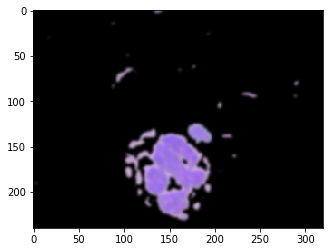

In [0]:
blur = cv2.GaussianBlur(result, (7, 7), 0)
plt.imshow(blur)
plt.show()

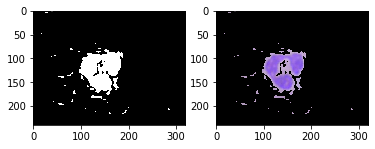

In [0]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [0]:
train = [segment(image) for image in train_x]